In [ ]:
!unzip /content/0753aae4bec411eb.zip

In [ ]:
!pip install shap
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [1]:
import pandas as pd
import sklearn
import numpy as np
import random
import seaborn as sns
import time
import datetime
import matplotlib.pyplot as plt

def get_data(data):
  print("Reading : ", data)
  temp = pd.read_csv(data)
  display(temp.head(10))
  return temp

In [2]:
train = get_data("./Train.csv")
test = get_data("./Test.csv")

Reading :  ./Train.csv


,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34
5,9670,Frank,Native,35,Male,JR88879,BCA,Computer Science,Tier 2,9,...,25,29,Married,4,DS,MidSized,Engineering,10,YearsOfExperince,93.23
6,16554,Joseph,Hindi,31,Male,JR85289,PhD,Computer Science,Tier 1,7,...,12,21,Single,3,SDE,Enterprise,Customer Success,8,CurrentCompanyType,62.29
7,3301,Thomas,English,32,Male,JR85289,B.Tech,Information Technology,Tier 2,8,...,7,17,Married,3,SSE,MidSized,Engineering,18,DegreeBranch,93.71
8,12236,Henry,English,28,Female,JR87525,M.Tech,Electrical,Tier 1,6,...,21,28,Married,4,SDE,Startup,Engineering,7,Gender,91.66
9,10157,Robert,Native,31,Female,JR88873,B.Tech,Artificial Intelligence,Tier 2,8,...,21,31,Married,3,SDE,Startup,Customer Success,10,Gender,73.31


Reading :  ./Test.csv


,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9
5,17679,Alma,Hindi,26,Male,JR87525,BCA,Information Technology,Tier 1,7,3,2018,15,20,Married,4,SSE,Enterprise,Design,16
6,9715,Angus,Hindi,28,Male,JR85289,M.Tech,Computer Science,Tier 1,8,2,2019,28,35,Married,3,DS,Startup,Design,18
7,12591,Annie,Hindi,27,Male,JR85289,Dual MBA,Electronics,Tier 1,7,4,2017,20,26,Single,3,SSE,Enterprise,Customer Success,11
8,6140,Ashley,English,35,Male,JR85289,B.Tech,Electronics,Tier 2,4,12,2009,14,20,Married,5,SSE,Enterprise,Engineering,4
9,21018,Augustine,Hindi,30,Male,JR89890,M.Tech,Electronics,Tier 2,8,4,2017,10,17,Married,2,SSE,Enterprise,Product,18


In [3]:
train.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split

# train an XGBoost model
X = train.drop(['EmpID', 'EmpName', 'BiasInfluentialFactor', 'FitmentPercent'], axis=1)
y = train[['FitmentPercent']]
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

In [6]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import mean_squared_error
from sklearn import metrics

params = {
    'iterations': [200, 400, 600],
    'learning_rate': [0.05, 0.1, 0.2, 0.5],
    'depth': [4,6],
    'min_data_in_leaf' : [10, 20]
}

model = CatBoostRegressor(random_seed= 42, eval_metric = 'RMSE', loss_function = 'RMSE', verbose=False, thread_count = 2)

train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

model.grid_search(params, train_pool, cv=4, shuffle=True, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 8.783040976
bestIteration = 198


bestTest = 8.762453502
bestIteration = 196


bestTest = 8.761494621
bestIteration = 110


bestTest = 8.809146561
bestIteration = 24


bestTest = 8.75978539
bestIteration = 393


bestTest = 8.758965463
bestIteration = 329


bestTest = 8.761494621
bestIteration = 110


bestTest = 8.809146561
bestIteration = 24


bestTest = 8.759665864
bestIteration = 441


bestTest = 8.758965463
bestIteration = 329


bestTest = 8.761494621
bestIteration = 110


bestTest = 8.809146561
bestIteration = 24


bestTest = 8.746278249
bestIteration = 199


bestTest = 8.733320838
bestIteration = 125


bestTest = 8.74476117
bestIteration = 67


bestTest = 8.754840001
bestIteration = 22


bestTest = 8.740103603
bestIteration = 269


bestTest = 8.733320838
bestIteration = 125


bestTest = 8.74476117
bestIteration = 67


bestTest = 8.754840001
bestIteration = 22


bestTest = 8.740103603
bestIteration = 269


bestTest = 8.733320838
bestIteration = 125


bestTest = 8.744761

{'params': {'min_data_in_leaf': 10,
  'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
            

In [8]:
model.save_model("./catboost_model")

In [3]:
from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.load_model('./catboost_model')

#### Predicting model output and importance of variables through Shap values and Shapley plot

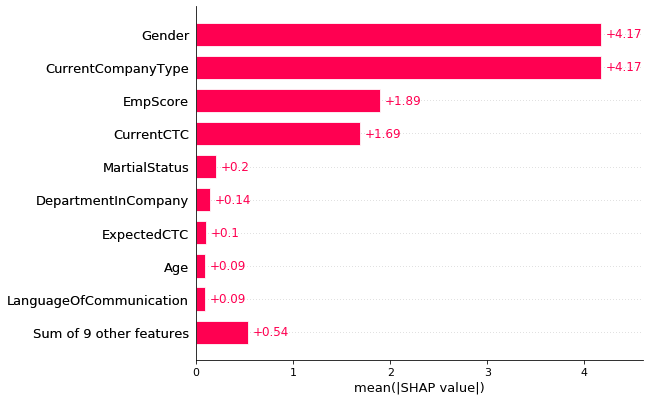

In [23]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
#Global Explanation
shap.plots.bar(shap_values)

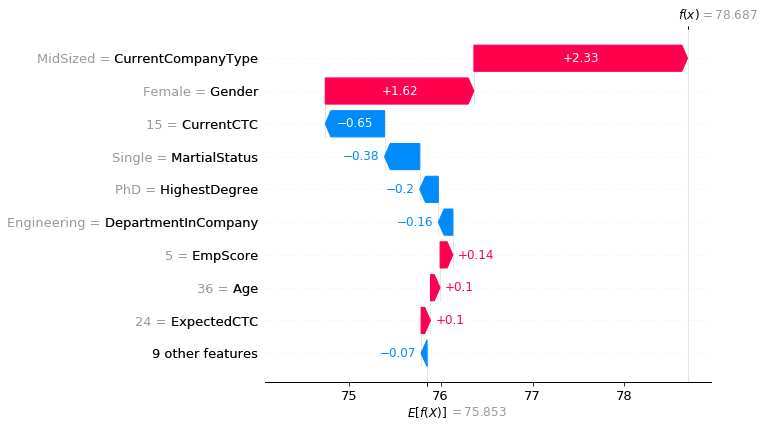

In [28]:
#Local Explanation
shap.plots.waterfall(shap_values[2])

#### Testing the model on test data

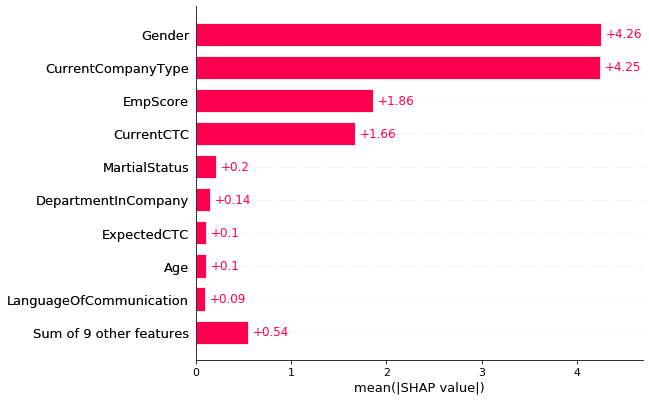

In [4]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(test.drop(['EmpID', 'EmpName'], axis=1))
#Global Explanation
shap.plots.bar(shap_values)

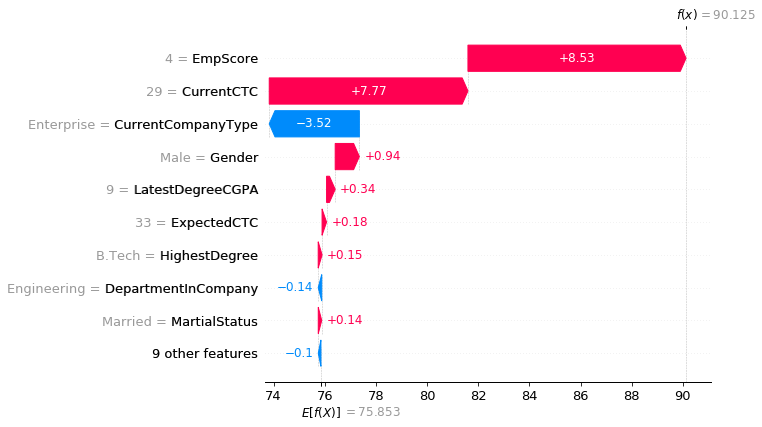

In [5]:
shap.plots.waterfall(shap_values[1])

In [10]:
ans = []
err = []
ct = 1
cols = test.drop(['EmpID', 'EmpName'], axis=1).columns

from tqdm import tqdm

_l = len(test)

with tqdm(total=_l) as pbar:
    for i in range(_l):
        try:
            index = np.argmax(shap_values[i].values)
            ans.append([cols[index], shap_values[i].base_values + shap_values[i].values.sum()])
        except:
            print(i, end=" ")
            err.append(i)
        pbar.update(1)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8745/8745 [1:14:24<00:00,  1.96it/s]


In [11]:
ans = pd.DataFrame(ans)
ans.columns = ['BiasInfluentialFactor', 'FitmentPercent']

submit = test[['EmpID']]
submit = pd.concat([submit, ans], axis=1)

submit.to_csv('Submit.csv', index=False)

In [14]:
submit.head()

,EmpID,BiasInfluentialFactor,FitmentPercent
0,5664,EmpScore,89.747022
1,23568,EmpScore,90.125329
2,21490,CurrentCompanyType,81.349299
3,8363,EmpScore,55.566021
4,6165,CurrentCompanyType,82.181740
